In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,8)
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(r'movies.csv', encoding='latin-1')
df.head()

Saving movies.csv to movies (3).csv


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
#Seaarching for missing data
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [ ]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [ ]:
#Change type of columns
df['budget']=df['budget'].astype('Int64')
df['gross']=df['gross'].astype('Int64')
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,NaN,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,NaN,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,NaN,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


In [ ]:
df['Year'] = df['released'].dt.year
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,NaN,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [ ]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
6380,245000000,NaN,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,NaN,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,NaN,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,NaN,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,NaN,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [ ]:
df['company'].sort_values(ascending=False)
df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
2                                   NaN
Name: company, Length: 2180, dtype: object

In [ ]:
df['company'] = df['company'].drop_duplicates()
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,NaN,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,NaN,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,NaN,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


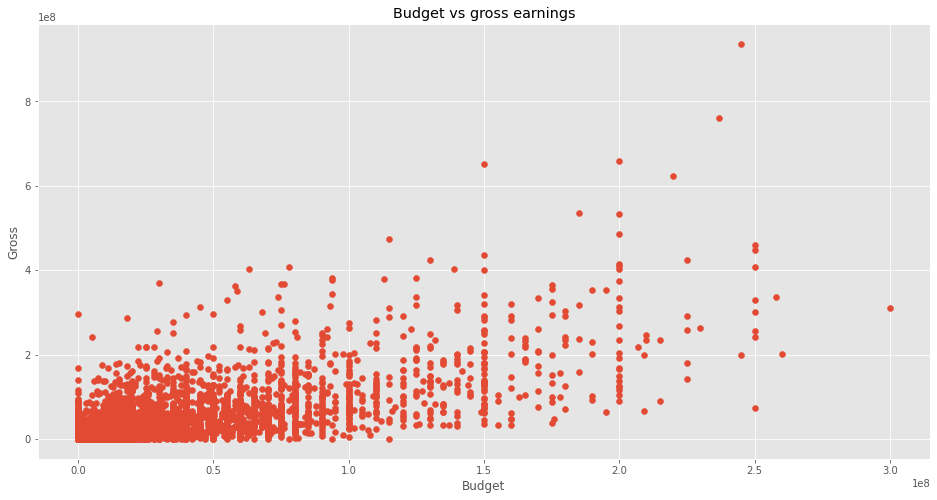

In [ ]:
#Scatter plot with budget and gross revenue
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [ ]:
df.corr()

,budget,gross,runtime,score,votes,year,Year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
Year,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


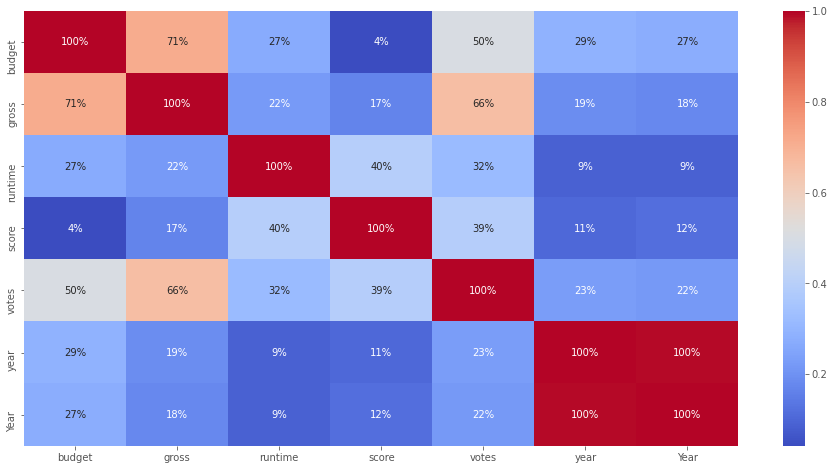

In [ ]:
#Lets take a look at correlation (pearson)

sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='coolwarm')

In [ ]:
df_num = df
for col_name in df_num.columns:
  if (df_num[col_name].dtype == 'object'):
    df_num[col_name] = df_num[col_name].astype('category')
    df_num[col_name] = df_num[col_name].cat.codes
df_num

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year
0,8000000,665,54,2192,1,52287414,4661,8,1986-08-22,89,8.1,2454,299174,3716,1986,1986
1,6000000,1680,54,1296,4,70136369,1821,7,1986-06-11,103,7.8,1605,264740,1970,1986,1986
2,15000000,-1,54,2645,0,179800601,6203,6,1986-05-16,110,6.9,2345,236909,1852,1986,1986
3,18500000,2062,54,1066,0,85160248,295,8,1986-07-18,137,8.4,2192,540152,1629,1986,1986
4,9000000,2122,54,2123,1,18564613,1872,6,1986-08-01,90,6.9,1139,36636,2549,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,-1,53,1623,4,4750497,230,8,2016-07-22,91,5.4,1066,9161,1800,2016,2016
6816,0,1914,54,1989,6,28368,3430,7,2016-05-06,90,4.9,2146,1959,3008,2016,2016
6817,3500000,-1,54,2313,2,3775000,577,8,2016-07-25,76,6.5,1355,36333,450,2016,2016
6818,0,415,54,1914,6,25981,5272,8,2016-12-02,76,6.2,1370,6947,2946,2016,2016


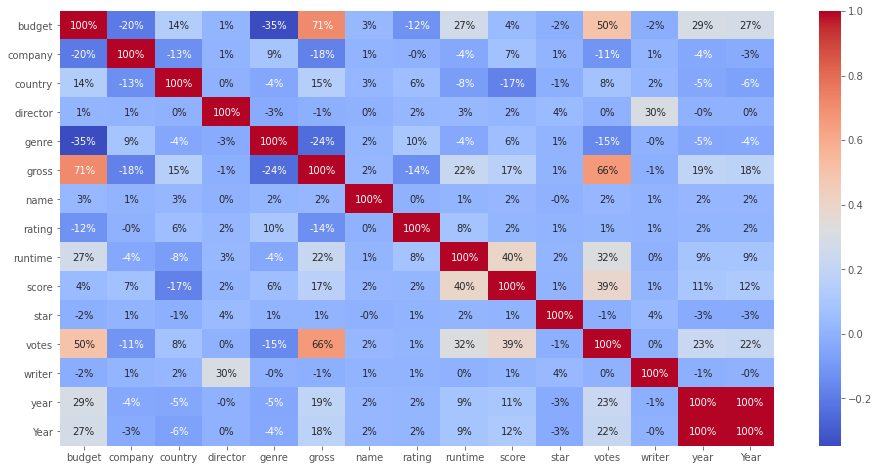

In [ ]:
sns.heatmap(df_num.corr(),annot=True,fmt='.0%',cmap='coolwarm')

In [ ]:
#Printing high correlation directly
correlation_pair = df_num.corr().unstack()
sorted_pair = correlation_pair.sort_values()
high_corr = sorted_pair[(sorted_pair)>0.5]
high_corr

votes     budget      0.503924
budget    votes       0.503924
gross     votes       0.662457
votes     gross       0.662457
budget    gross       0.712196
gross     budget      0.712196
Year      year        0.996229
year      Year        0.996229
budget    budget      1.000000
rating    rating      1.000000
writer    writer      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
year      year        1.000000
Year      Year        1.000000
dtype: float64

# Votes and budget has the highest correlation
#Company has low correlation